<a href="https://colab.research.google.com/github/maugsan/QnA-ngrams/blob/main/Question_Answering_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Question Answering System 
## Workflow

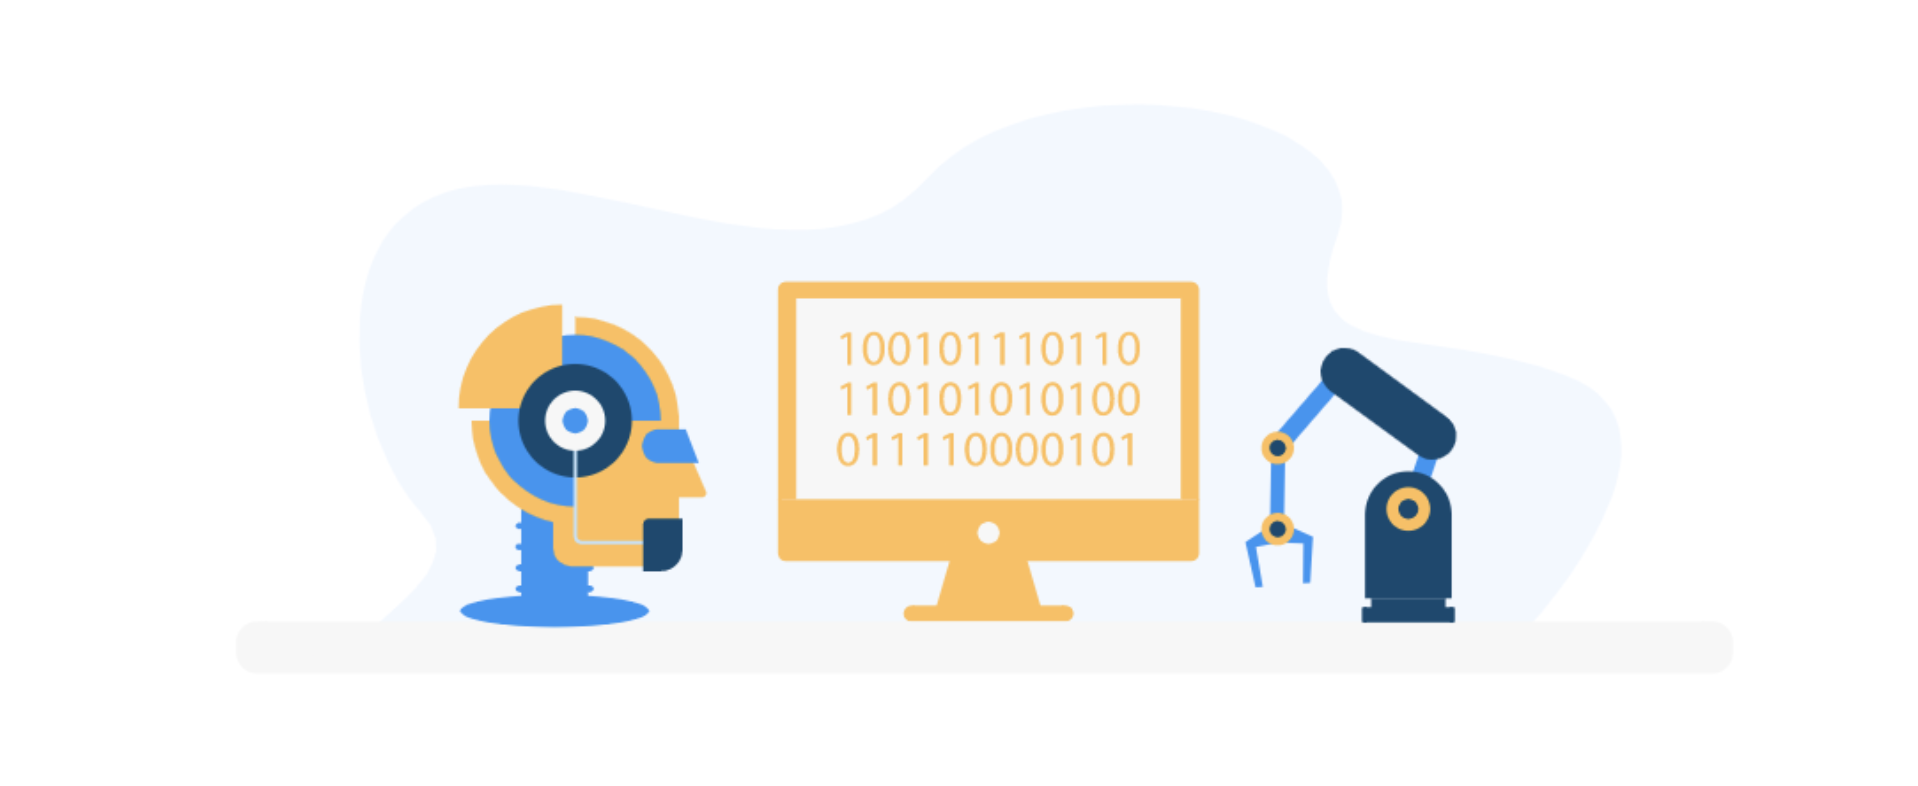

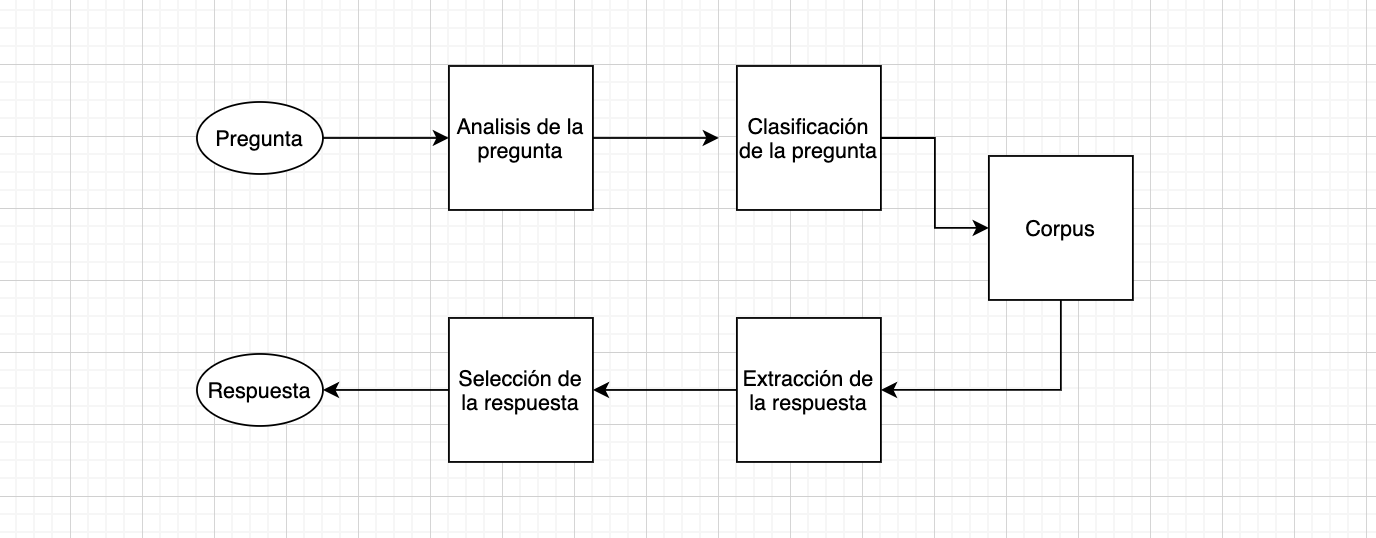

# **ENTRADA** : {Pregunta}

In [840]:
import pickle
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

nltk.data.clear_cache()
question = """


<s> Mamá ama a papá </s>.
<s> Papá ama a mamá </s>.
<s> Mi papá me ama </s>.
<s> Mi papá me mima </s>.

"""
parts = nltk.sent_tokenize(question)

questions = []
for part in parts:
  temp = part.strip().replace(".","")
  questions.append(temp) 
  print(temp)

with open('questions.p', "wb") as f:
    pickle.dump(questions, f)





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<s> Mamá ama a papá </s>
<s> Papá ama a mamá </s>
<s> Mi papá me ama </s>
<s> Mi papá me mima </s>


# 1. Análisis de la pregunta

# 2. Clasificación de la pregunta

In [826]:
def classify_question(question):
    q = question.lower().split()
    if q[0] == 'where':
        return 'Location'
    if q[0] == 'which':
        return 'Term or Thing'
    elif 'year'  in question:
            return 'Date'
    elif 'time'  in question:
            return 'Time'
    elif 'country' in question:
        return 'Country'
    elif q[0] == 'who':
        return 'Person'
    elif q[0] == 'what':
        return 'Definition'
    else:
      return 'None'


question = []
with (open("questions.p", "rb")) as openfile:
    while True:
        try:
            question.append(pickle.load(openfile))
        except EOFError:
            break

classify_question(question[0][0])

'None'

# 3. Extracción de la *infomación* IE

In [829]:

import nltk.data
import pickle
nltk.data.clear_cache()
#corpus = nltk.data.load('chapter01.txt', format='text')
#corpus  = nltk.data.load('book_ES_1_2.txt', format='text')

corpus = """
<s> Esa es la mesa </s> . 
<s> La masa está en la mesa </s> .
<s> Papá amasa en la mesa </s> .
<s> La mesa </s>.
<s> Mi papá me mima </s>.
<s> Mi mamá me ama </s>.
<s> Papá ama a mamá </s>. 

"""

# Save corpus
with open('corpus.p', "wb") as f:
    pickle.dump(corpus, f)

print(corpus)




<s> Esa es la mesa </s> . 
<s> La masa está en la mesa </s> .
<s> Papá amasa en la mesa </s> .
<s> La mesa </s>.
<s> Mi papá me mima </s>.
<s> Mi mamá me ama </s>.
<s> Papá ama a mamá </s>. 




In [838]:
import re
from nltk.tokenize import sent_tokenize
nltk.data.clear_cache()

corpus = []
with (open("corpus.p", "rb")) as openfile:
    while True:
        try:
            corpus.append(pickle.load(openfile))
        except EOFError:
            break


# Split the text in array of sentences
sentences = nltk.sent_tokenize(corpus[0])

# Replace special characters
#sentence_list = [re.sub(r"[^a-zA-Z ]", " ", temp) for temp in sentences]


# Print sentences filtered
new_corpus = ""
for s in sentences:
  new_corpus += "<s> "+ s.replace('\n', '').replace('.', '')  + "<s> "
  # print(" <s> "+ s.replace('\n', '').replace('.', '') + " </s> " )


with open('sentences.p', "wb") as f:
    pickle.dump(new_corpus, f)







# 4. Selección de respuestas


### Separación de oraciones(sentences)






In [831]:
objects = []
with (open("questions.p", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break


for ob in objects[0]:
  print( ob)



<s> Mamá ama a papá </s>
<s> Papá ama a mamá </s>
<s> Mi papá me ama </s>
<s> Mi papá me mima </s>
<s> Mi papá me mimas </s>


In [832]:
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

corpus = []
with (open("corpus.p", "rb")) as openfile:
    while True:
        try:
            corpus.append(pickle.load(openfile))
        except EOFError:
            break

tokens = WhitespaceTokenizer().tokenize(corpus[0].lower() )
unigrams = ngrams(tokens, 1)

size = Counter(tokens)

print(size)
with open('unigram_count.p', "wb") as f:
    pickle.dump(size, f)



Counter({'<s>': 7, 'la': 5, 'mesa': 4, '</s>.': 4, '</s>': 3, '.': 3, 'papá': 3, 'en': 2, 'mi': 2, 'me': 2, 'mamá': 2, 'ama': 2, 'esa': 1, 'es': 1, 'masa': 1, 'está': 1, 'amasa': 1, 'mima': 1, 'a': 1})


# 5. Análisis de las *respuestas*

In [834]:
from collections import Counter
from nltk import ngrams
from tabulate import tabulate
import pandas

#get corpus
corpus = []
with (open("corpus.p", "rb")) as openfile:
    while True:
        try:
            corpus.append(pickle.load(openfile))
        except EOFError:
            break
            
x = re.sub(r"[^a-zA-Z ]", " ", corpus[0])

bigrm = nltk.bigrams(corpus[0].replace(".","").lower().split())

c = Counter(bigrm)

result = pandas.DataFrame(c.most_common(),
                columns=['Bigram', 'Frequency'])
print(result)
result.to_csv('model.csv',index=False)
    

    

           Bigram  Frequency
0     (</s>, <s>)          6
1      (la, mesa)          4
2    (mesa, </s>)          4
3       (<s>, la)          2
4        (en, la)          2
5     (<s>, papá)          2
6       (<s>, mi)          2
7      (<s>, esa)          1
8       (esa, es)          1
9        (es, la)          1
10     (la, masa)          1
11   (masa, está)          1
12     (está, en)          1
13  (papá, amasa)          1
14    (amasa, en)          1
15     (mi, papá)          1
16     (papá, me)          1
17     (me, mima)          1
18   (mima, </s>)          1
19     (mi, mamá)          1
20     (mamá, me)          1
21      (me, ama)          1
22    (ama, </s>)          1
23    (papá, ama)          1
24       (ama, a)          1
25      (a, mamá)          1
26   (mamá, </s>)          1


In [841]:
"""--------------------------
 Libraries 
--------------------------"""
#!pip install nltk
import math
from nltk.util import ngrams
from nltk import *
from collections import Counter
import pandas


def likehood_estimate(sentence, bigrams, unigrams, debug=False, smoothing=False, ):
  """
  MLE 
  :sentence:
  :debug: boolean print some variables dumps
  :smoothing: boolean add laplace smoothing
  """
  V = len(unigrams)

  prob_list = []
  prob_list.append(sentence)
  for current in nltk.bigrams(sentence.lower().split()):

    bigram_p = get_value(bigrams, str(current))
    if(bigram_p):
      bigram_p = bigram_p["Frequency"]
    else:
       bigram_p = 0
    uni, unii = current  
    unigram_p = get_value(unigrams, uni) 
    if (smoothing_laplace):
        print(unigram_p)
        prob = ( bigram_p + 1 ) / (unigram_p + V)
        print(current , ':', bigram_p, "+ 1 /",unigram_p,  '+ V = ', prob)
    else:
      print(bigram_p)
      prob = bigram_p/unigram_p
    
      print(current , ':', bigram_p, "/",unigram_p, ' = ', prob)
    
    prob_list.append(prob)
     
    if (debug):
      print(sentence)
      print(bigram_p)
      print(V)
      print(unigram_p)

  return prob_list

def get_value(d, search_key):
    match = None
    d = iter(d.items())
    try:
        match = next(val for key, val in d if search_key in key)
        return match
    except:
        pass
    return match



"""--------------------------
 Main
--------------------------"""

questions = []
display_logs = False
smoothing_laplace = True
"""--------------------------
  Load resources
--------------------------"""
#load questions
with (open("questions.p", "rb")) as openfile:
    while True:
        try:
            questions.append(pickle.load(openfile))
        except EOFError:
            break

#load bigrams model 
bigrams = 'model.csv'
bigrams = pandas.read_csv(model, index_col=0, skiprows=0).T.to_dict()

#load unigrams
unigrams = []
with (open("unigram_count.p", "rb")) as openfile:
  while True:
      try:
          unigrams.append(pickle.load(openfile))
      except EOFError:
          break


# iterate each question questions[0]
answers = []
for question in questions[0]:
  mle = likehood_estimate(question, bigrams, unigrams[0], display_logs, smoothing_laplace)
  answers.append(mle)
  print("\n")


with open('answers.p', "wb") as f:
    pickle.dump(answers, f)

7
('<s>', 'mamá') : 0 + 1 / 7 + V =  0.038461538461538464
2
('mamá', 'ama') : 0 + 1 / 2 + V =  0.047619047619047616
1
('ama', 'a') : 1 + 1 / 1 + V =  0.1
1
('a', 'papá') : 0 + 1 / 1 + V =  0.05
3
('papá', '</s>') : 0 + 1 / 3 + V =  0.045454545454545456


7
('<s>', 'papá') : 2 + 1 / 7 + V =  0.11538461538461539
3
('papá', 'ama') : 1 + 1 / 3 + V =  0.09090909090909091
1
('ama', 'a') : 1 + 1 / 1 + V =  0.1
1
('a', 'mamá') : 1 + 1 / 1 + V =  0.1
2
('mamá', '</s>') : 1 + 1 / 2 + V =  0.09523809523809523


7
('<s>', 'mi') : 2 + 1 / 7 + V =  0.11538461538461539
2
('mi', 'papá') : 1 + 1 / 2 + V =  0.09523809523809523
3
('papá', 'me') : 1 + 1 / 3 + V =  0.09090909090909091
4
('me', 'ama') : 1 + 1 / 4 + V =  0.08695652173913043
1
('ama', '</s>') : 1 + 1 / 1 + V =  0.1


7
('<s>', 'mi') : 2 + 1 / 7 + V =  0.11538461538461539
2
('mi', 'papá') : 1 + 1 / 2 + V =  0.09523809523809523
3
('papá', 'me') : 1 + 1 / 3 + V =  0.09090909090909091
4
('me', 'mima') : 1 + 1 / 4 + V =  0.08695652173913043
1
('mi

# **SALIDA**: Respuesta

In [842]:
#!pip install colorama
from colorama import Fore, Back, Style
answers = []
with (open("answers.p", "rb")) as openfile:
    while True:
        try:
            answers.append(pickle.load(openfile))
        except EOFError:
            break

summative = 0
for anwser in answers[0]:
  selected_anwser.append(anwser[0])  
  for x in range(1, len(anwser) - 1 ): # erase first and last
        summative += anwser[x]

  selected_anwser.append(summative)
  print(anwser[0],' ',summative)

print("\n")
c = Counter(selected_anwser)
print(Fore.WHITE + '')

for word, count in c.most_common(1):
  print(Back.GREEN +"{}".format(word, count ))

print(Style.DIM + '')
print(Style.RESET_ALL)

<s> Mamá ama a papá </s>   0.23608058608058607
<s> Papá ama a mamá </s>   0.6423742923742923
<s> Mi papá me ama </s>   1.0308626156452243
<s> Mi papá me mima </s>   1.419350938916156



<s> Mi papá me mima </s>




Referencias:
